Programmer: Colleen Lemak  
Class: CPSC222, Fall 2021  
Data Assignment #6  
Date: 11/17/21  
Description: This program uses Jupyter Notebook to tell an EDA story and execute various tasks.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

### CPSC 122 Statistics!
Objective of our study:
* In this study, we collected data from students in two different sections of Gonzaga's CPSC 122 course.
    * We tested if students' timeliness in pushing to GitHub would improve using a fully automated gamification software tool.

Information about our datasets:
* s1 represents data from the control group, while s2 represents data collected from the experiment group with our designed tool.
* Each group has 25 students total.


In [4]:
s1 = [15, 50, 0, 5, 0, 2, 0, 0, 0, 2, 0, 7, 0, 0, 0, 3, 0, 0, 12, 15, 0, 1, 0, 0, 0]
s2 = [33, 3, 2, 8, 0, 41, 2, 0, 20, 1, 0, 0, 3, 17, 0, 5, 2, 0, 14, 4, 16, 22, 28, 4, 94]

s1 = pd.Series(s1)
s2 = pd.Series(s2)

### Calculating Detailed Statistics

1. s2 Mid Value 
    * $\frac{min+max}{2}$
2. s2 Mean
    * $\overline{x}$ = $\frac{\sum_{}{}{s2}}{n}$
3. s2 Median
    * if n is odd:
        * i = $\frac{n+1}{2}$
        * median = $x_{i}$
    * if n is even:
        * i = $\frac{n}{2}$
        * median = $\frac{x_i + x_{i+1}}{2}$
4. s2 Mode
    * $s2.mode()$ = most frequently occurring data value
5. s2 Range
    * $s2.max() - s2.min()$
6. s2 Quartiles
    * $s2.quantile([0.25])$
    * $s2.quantile([0.50])$
    * $s2.quantile([0.75])$
7. s2 Variance
    * $s_{p}^2$ = $\frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1+n_2-2}$
8. s2 Standard Deviation
    * $\sqrt\frac{{\sum{}{}{(x-\overline{x})^2}}}{n-1}$
9. s1 95% confidence interval for the population mean
    * $\overline{X}\pm t \frac{s}{\sqrt{n}}$   
    * Margin of error: $Z \frac{\sigma}{\sqrt{n}}$  
    * Z = Critical Value  
    * $\frac{\sigma}{\sqrt{n}}$ = Standard Error  
    * $\sigma$ = Standard Dev  
    * N = Sample Size  
10. s2 95% confidence interval for the population mean
    * $\overline{X}\pm t \frac{s}{\sqrt{n}}$   
    * Margin of error: $Z \frac{\sigma}{\sqrt{n}}$  
    * Z = Critical Value  
    * $\frac{\sigma}{\sqrt{n}}$ = Standard Error  
    * $\sigma$ = Standard Dev  
    * N = Sample Size 

Now continuing #10, let's visualize s1 and s2 95% confidence intervals:

In [5]:
Xbar_s1 = np.mean(s1)
Xbar_s2 = np.mean(s2)
std_s1 = np.std(s1, ddof=1)
std_s2 = np.std(s2, ddof=1)

n_s1 = len(s1)
n_s2 = len(s2)
t_critical = 2.064

margin_of_error_s1 = (t_critical * std_s1) / np.sqrt(n_s1)
margin_of_error_s2 = (t_critical * std_s2) / np.sqrt(n_s2)

conf_interval_s1 = (round(Xbar_s1 - margin_of_error_s1, 2), round(Xbar_s1 + margin_of_error_s1, 2))
print("We are 95% certain that the s1 population mean is in", conf_interval_s1)

conf_interval_s2 = (round(Xbar_s2 - margin_of_error_s2, 2), round(Xbar_s2 + margin_of_error_s2, 2))
print("We are 95% certain that the s2 population mean is in", conf_interval_s2)

We are 95% certain that the s1 population mean is in (0.11, 8.85)
We are 95% certain that the s2 population mean is in (4.29, 21.23)


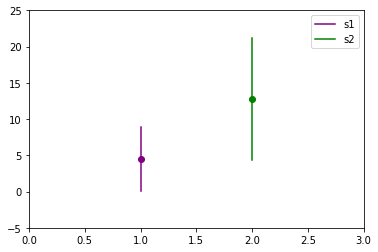

In [6]:
# coding up s1 visualization
plt.plot([1], [Xbar_s1], color="purple", marker="o")
plt.plot([1, 1], conf_interval_s1, color="purple", label="s1")

# coding up s2 visualization
plt.plot([2], [Xbar_s2], color="green", marker="o")
plt.plot([2, 2], conf_interval_s2, color="green", label="s2")

plt.xlim([0.0, 3.0])
plt.ylim([-5.0, 25.0])
plt.legend()
plt.show()

11. s2 one-sample, one-tailed t-test of the population mean
* We are using the t-test to test the following hypothesis: 
    * Hypothesis: on average, the s2 students pushed more than 7 total days in advance of the deadline.
        * Our question: on average, did the s2 students push more than 7 total days in advance of the deadlines? 
            * That could be about 1 day early per assignment (or 1 assignment 7 days early, etc.).
    * Our level of significance is 0.05.
    * Question after calculations: Are the results from the confidence interval and the hypothesis testing consistent?

Let's use the 5 Step Hypothesis Testing Approach...
1. Identify the null and alternative hypothesis
2. Select the level of significance of the test
3. Select the appropriate test statistic
4. Formulate the decision rule
5. Make a decision

**1. Identify the null and alternative hypothesis**

* Null hypothesis
    * On average, the s2 students pushed less than or equal to 7 total days in advance of the deadline.
        * $H_0$: $\mu_{s2}$ $\le$ 7 total days pushed in advance

* Alternative hypothesis
    * On average, the s2 students pushed more than 7 total days in advance of the deadline.
        * $H_1$: $\mu_{s2}$ > 7 total days pushed in advance

**2. Select the level of significance of the test**

* Level of significance 
    * $\alpha$ = 0.05

**3. Select the appropriate test statistic**

* T-test statistic
    * One sample and one tailed
    * Calculate population mean
* So, use this formula:
    * t = $\frac{\overline{x} - \mu}{s/\sqrt{n}}$

**4. Formulate the decision rule**

* From our table, we can conclude that our t-critical value is 1.711.
    * Therefore we can formulate the following decision rules:
        * If our t-computed value is more than 1.711, we reject $H_0$.
        * If our t-computed value is less than or equal to 1.711, we do not reject $H_0$.

**5. Make a decision**

In [19]:
mu = 7
t_critical = 1.711
Xbar_s2 = np.mean(s2)
std_s2 = np.std(s2, ddof=1)

t_manual_computed = (Xbar_s2 - mu) / (std_s2 / np.sqrt(n_s2))

print("t-manual-computed:", t_manual_computed)

t-manual-computed: 1.4041431750540165


In [8]:
# check our t-computed with scipy
t_scipy_computed, p_value = stats.ttest_1samp(s2, 7)
print("t-SciPy-computed:", t_scipy_computed)
print("p-value:", p_value/2)

t-SciPy-computed: 1.404143175054016
p-value: 0.08654267665291937


* **Decision-making time!**
    * Since our t-computed value, checked by SciPy as 1.404, is less than 1.711, we can conclude from our decision rule, with a 0.05 level of significance, that we do not reject $H_0$, meaning s2 students on average pushed less than or equal to 7 days in advance.
    * Thus, the results from the confidence interval and the hypothesis testing support and indicate consistency.

12. s1 and s2 two-sample, one-tailed t-test of the population means

* We are using the t-test to test the following hypothesis: 
    * Hypothesis: on average, the s2 students pushed final commits earlier than the s1 students.
        * Our question: did the s2 students push final commits earlier on average than the s1 students?
    * Our level of significance is 0.05.
    * Question after calculations: Did the s2 students push final commits earlier on average than the s1 students?

Again, we'll use the 5 Step Hypothesis Testing Approach...
1. Identify the null and alternative hypothesis
2. Select the level of significance of the test
3. Select the appropriate test statistic
4. Formulate the decision rule
5. Make a decision

**1. Identify the null and alternative hypothesis**

* Null hypothesis
    * On average, the s2 students pushed final commits later than or on the same day as the s1 students.
        * $H_0$: $\mu_{s2}$ $\le$ $\mu_{s1}$

* Alternative hypothesis
    * On average, the s2 students pushed final commits earlier than the s1 students.
        * $H_1$: $\mu_{s2}$ > $\mu_{s1}$

**2. Select the level of significance of the test**

* Level of significance 
    * $\alpha$ = 0.05

**3. Select the appropriate test statistic**

* T-test statistic
    * Two-sample (s1 and s2, independent) and one-tailed
    * Calculate population means
* So, use this formula:
    * t = $\frac{\overline{X}_1 - \overline{X}_2}{\sqrt{s_p^2(\frac{1}{n_1} + \frac{1}{n_2})}}$

**4. Formulate the decision rule**

* From our table, we can conclude that our t-critical value is 1.684.
    * Therefore we can formulate the following decision rules:
        * If our t-computed value is greater than 1.684, we reject $H_0$.
        * If our t-computed value is less than or equal to 1.684, we do not reject $H_0$.

**5. Make a decision**

In [23]:
t_critical = 1.684
Xbar_s1 = np.mean(s1)
Xbar_s2 = np.mean(s2)
std_s1 = np.std(s1, ddof=1)
std_s2 = np.std(s2, ddof=1)
n_s1 = 25
n_s2 = 25

df = n_s1 + n_s2 - 2
sp2 = ((n_s1 - 1) * std_s1 ** 2 + (n_s2 - 1) * std_s2 ** 2) / df
# t_manual_computed = (Xbar_s1 - Xbar_s2) / np.sqrt(sp2 * (1 / n_s1 + 1 / n_s2))
t_manual_computed = (Xbar_s2 - Xbar_s1) / np.sqrt(sp2 * (1 / n_s1 + 1 / n_s2))
print("t-manual-computed:", t_manual_computed)


t-manual-computed: 1.794018604733852


In [24]:
# check our t-computed with scipy
t_scipy_computed, p_value = stats.ttest_ind(s2, s1, equal_var=False)
print("t-SciPy-computed:", t_scipy_computed)
print("p-value:", p_value/2)

t-SciPy-computed: 1.794018604733852
p-value: 0.04061593628200728


* **Decision-making time!**
    * Since our t-computed value, checked by SciPy as 1.7940, is greater than 1.684, with a 0.05 level of significance, we can conclude from our decision rule that we reject $H_0$.
    * Thus, the s2 students pushed final commits earlier than the s1 students.